In [2]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [4]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import sqrt

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


1. Some records are NaN, so they are not counted and there are these lower counts. We can display some Data Vectors as following. 

2. There can be two main reasons for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month). The first reason is that the weather is extremely bad or there is much snow so that the data of the weather cannot be collected. The second reason is that at that time there are some holidays so that people would not collect the data of the weather. 

3. It is restricted to a subset of the stations since there are still many stations that can collect the data of the weather. To remove this effect, we can just skip the whole year data of those stations that didn't collect the data at the beginning and end of the year. Even, we can also skip those stations that didn't collect the data at the end of each month.

4. 'SNWD' represents the snow depth (mm). We can find that 'SNWD' changes smoothly since it is like to the process of integral of snow falling. We can find that the values of 'SNWD' become largest around months Dec., Jan., Feb., Mar.. At that time, it's very cold (winter). Around months Jun. to Nov. the values of 'SNWD' are small since it's warm (summer).


### Instructor comments

You provided no explanations, but rather jumped directly to solutions. Obviously, removing stations with missing entries will solve the problem, but it might also introduce bias. By characterizing the problem more accurately, you can reduce this bias.

No extra points.

In [6]:
Data=pickle.load(open('../../Data/Weather/SampleStations.pickle','r'))
FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df
original = m_df[m][range(1,366)].iloc[:,:].values

In [7]:
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    oristat = m_df[m].iloc[:,:].values
    yearstat = filter(lambda x: (sum(np.isnan(list(x[3:33]))) == 30) &  (sum(np.isnan(list(x[338:368]))) == 30), oristat)
    yearstation = map(lambda x: x[0], yearstat)
    # for Jan 1st - Feb 1st & Dec 1st - Jan 1st
    print 'Measurement:', m, 'Year', set(yearstation)
    # choose the last day of each month to find whether it's NaN.
    lastmonth = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    ld = [sum(lastmonth[:i]) for i in range(1,13)]
    monthstat = filter(lambda x: sum(np.isnan([x[i+2] for i in ld])) == 12, oristat)
    # The stations whose records are NaN at the end of each month for a whole year
    monthstation = map(lambda x: x[0], monthstat)
    print 'Measurement:', m, 'Months:', set(monthstation)
    ym = set(yearstation).intersection(monthstation)
    print 'Measuremnt:', m, 'Intersections:', ym
    print

Measurement: TMIN Year set(['USC00460580', 'USC00043320', 'USC00484995', 'USC00053147', 'USC00214989', 'USC00102390', 'USC00440188', 'CA001103324', 'USC00382386', 'USC00035018', 'USC00352697', 'USC00407979', 'USC00035376', 'USR0000ITEA', 'USC00300668', 'USC00448062', 'USC00330083', 'USC00293134', 'USC00088737', 'USC00031457', 'USC00290125', 'USC00416000', 'USC00391049', 'USC00243885', 'USC00354939', 'CA001124110', 'USC00082936', 'CA006147693', 'USC00164693', 'USC00257640', 'USC00113522', 'USC00111841', 'USC00438644', 'USW00012884', 'USC00388186', 'CA004039000', 'USR0000CMEN', 'USC00294310', 'USC00024299', 'USC00235492', 'USC00428741', 'MX000003074', 'USC00167161', 'USW00093807', 'USC00428600', 'USC00227252', 'USC00412769'])
Measurement: TMIN Months: set(['USC00088737', 'USC00214453', 'USC00043320', 'USC00414770', 'USC00304575', 'USC00294310', 'USC00102390', 'USC00160537', 'USC00477869', 'USW00093206', 'USC00476398', 'USC00382386', 'USW00022016', 'USC00305840', 'USC00384886', 'USC001554

The records that are NaN are mostly located at these stations. That's to say that it is restricted to a subset of the stations. The results may be related to the events or weather of the local areas. There can be some holidays or the extreme weather conditions.

From the above resulst of the intersections of the year and months, we can find that it is restricted to a subset of the stations. The name of those stations are shown above. The main stations are located at US1 (US Route 1), USC.

We can remove those stations that made no records around the beginnings and endings of years and the endings of months as following.

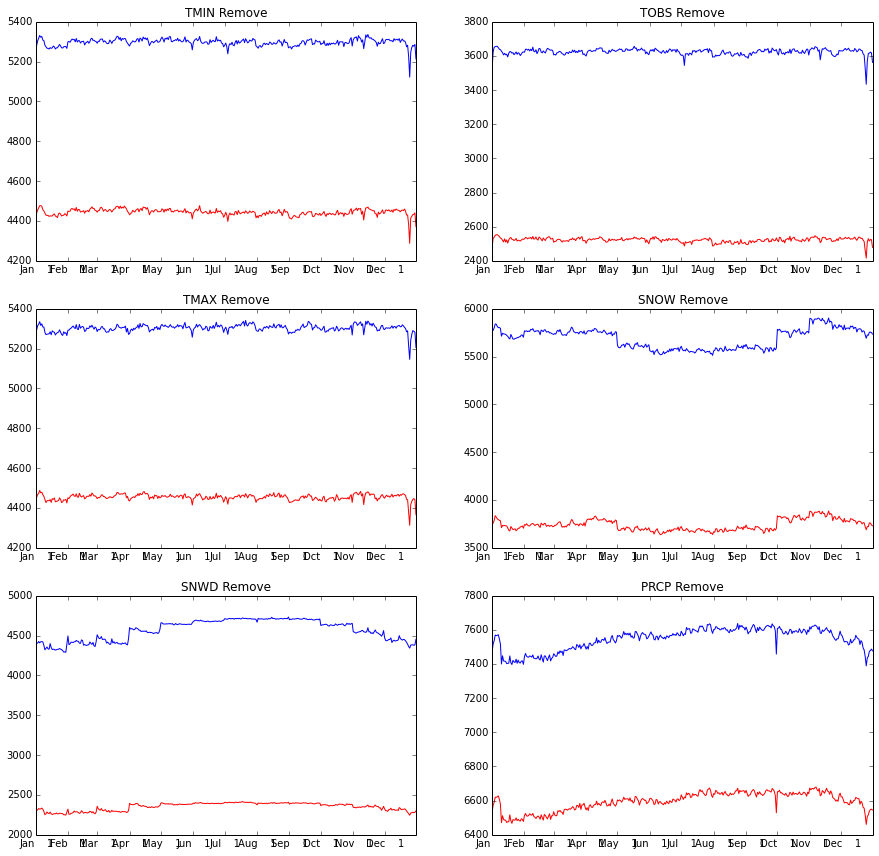

In [116]:
figure(figsize=(15,30))
offset=1
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    mpl.rcParams['axes.color_cycle'] = ['r','b']
    subplot(6,2,offset)
    offset+=1
    oristat = m_df[m].iloc[:,:].values
    yearstat = filter(lambda x: (sum(np.isnan(list(x[3:33]))) == 30) &  (sum(np.isnan(list(x[338:368]))) == 30), oristat)
    yearstation = map(lambda x: x[0], yearstat)
    # for Jan 1st - Feb 1st & Dec 1st - Jan 1st
    #print 'Measurement:', m, 'Year', set(yearstation)
    # choose the last day of each month to find whether it's NaN.
    lastmonth = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    ld = [sum(lastmonth[:i]) for i in range(1,13)]
    monthstat = filter(lambda x: sum(np.isnan([x[i+2] for i in ld])) == 12, oristat)
    # The stations whose records are NaN at the end of each month for a whole year
    monthstation = map(lambda x: x[0], monthstat)
    #print 'Measurement:', m, 'Months:', set(monthstation)
    ym = set(yearstation).intersection(monthstation)
    #print 'Measuremnt:', m, ym
    rmset = filter(lambda x: x[0] not in ym, oristat)
    rmcount = reduce(lambda x,y: x+y, map(lambda x: 1-np.isnan(list(x[3:])), rmset))
    YearlyPlots(T=rmcount,ttl=m+' Remove')
    YearlyPlots(T=reduce(lambda x,y: x+y, map(lambda x: 1-np.isnan(list(x[3:])), oristat)),ttl=m+' Remove')

The blue curves are original data and the red lines are data after removing those stations. There are only slight differences between them. We need more data to test the removing effect.